<a href="https://colab.research.google.com/github/PratikshaShelke24/data-science/blob/main/unsuperviesd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#K-Means clustering implementation

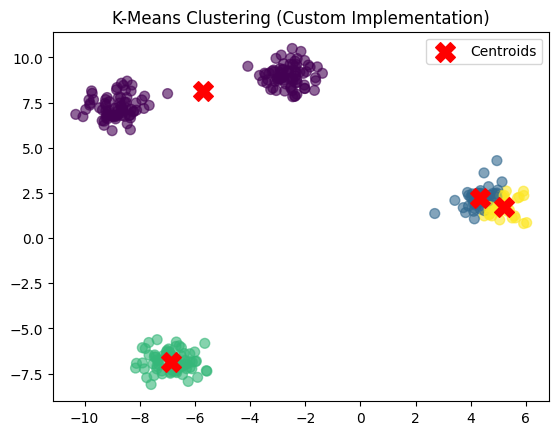

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


# Generate dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60)

# Number of clusters
k = 4

# Randomly initialize centroids
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Function to assign clusters
def assign_clusters(X, centroids):
    distances = cdist(X, centroids, 'euclidean')
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# Iterate until convergence
max_iters = 100
for i in range(max_iters):
    labels = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, labels, k)
    if np.all(centroids == new_centroids):  # Convergence check
        break
    centroids = new_centroids

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.title("K-Means Clustering (Custom Implementation)")
plt.show()


In [ ]:
#KNN implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data  # Features (sepal & petal length & width)
y = iris.target  # Labels (Setosa, Versicolor, Virginica)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (KNN is sensitive to scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [3]:
# Choose K=5 (you can try different values)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [4]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00
